In [10]:
import sympy as sp
from sympy import poly
import numpy as np
import math
import matplotlib.pyplot as plt
class TransferFunctionModel(object):
    #TransferFunction Model, num and den is coefficent
    def __init__(self,num,den,tau = 0):
        self.num = num
        self.den = den
        self.tau = tau
        pass
    
    def freqres(self, w, unwarp = False):
        
        b = self.num
        a = self.den
        tau = self.tau
        s = 1j * w
        h = np.polyval(b, s) * np.exp(-tau * s) / np.polyval(a, s)
        print(np.absolute(h))
        h = np.complex64(h)
        amp = 20 * np.log10(np.absolute(h))
        pha = None
        if unwarp:
            pha = np.unwrap(np.arctan2(h.imag, h.real)) * 180 / math.pi
        else:
            pha = np.arctan2(h.imag, h.real) * 180 / math.pi
        return amp, pha
    
    
    def plot(self, freq = None):
        if freq is None:
            freq = np.linspace(1.0,10,10)
        print(freq)
        amp,pha = self.freqres(freq,True)
        plt.semilogx(freq,amp,label="Amp")
        plt.semilogx(freq,pha,label="Pha")

    

class TransferFunctionParamModel(object):
    #A TransferFunction with unknown parameters
    
    def __init__(self,num,den,tau = 0):
        self.num = num
        self.den = den
        self.tau = tau
        self.s = sp.symbols('s')
    
    def transfer_function_by_dict(self, sym_dict):
        s = self.s
        num_formula =  self.num.subs(sym_dict)
        num = poly(num_formula,s).all_coeffs()

        den_formula =  self.den.subs(sym_dict)
        den = poly(den_formula,s).all_coeffs()
        
        return TransferFunctionModel(num,den,self.tau)
    
    def get_unknown_param_list(self):
        syms = self.num.atoms(sp.Symbol) 
        syms.update(self.den.atoms(sp.Symbol))
        syms.remove(self.s)
        return syms

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1.38675049056307 1.00000000000000 0.745355992499930 0.585205735980653
 0.478913142610576 0.404226041727222 0.349215147884789 0.307147558416976
 0.273998312175595 0.247234088217074]


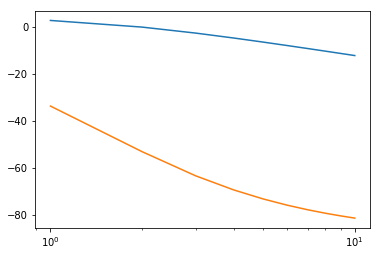

In [11]:
s,a,b,c = sp.symbols('s a b c')
num = c*s+0
den = a*s**2 + b*s

tfparam = TransferFunctionParamModel(num,den)

tf = tfparam.transfer_function_by_dict({
    a : 2,
    b:  3,
    c : 5
})
tf.__dict__
tf.plot()

In [12]:
tfparam.get_unknown_param_list()

{a, b, c}